In [1]:
pip install codecarbon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.6/174.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 11.8 MB/s eta 0:00:00


In [ ]:
! codecarbon init
from codecarbon import EmissionsTracker
import time

# Initialize CodeCarbon EmissionsTracker
tracker = EmissionsTracker()
tracker._geo


Welcome to CodeCarbon, here is your experiment id:
f45293ee-d68f-47f5-8521-54abc96f97c0

CodeCarbon automatically added this id to your local config: ./.codecarbon.config



[codecarbon INFO @ 10:33:55] [setup] RAM Tracking...
[codecarbon INFO @ 10:33:55] [setup] GPU Tracking...
[codecarbon INFO @ 10:33:55] No GPU found.
[codecarbon INFO @ 10:33:55] [setup] CPU Tracking...
[codecarbon WARNING @ 10:33:55] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:33:57] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:33:57] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:33:57] >>> Tracker's metadata:
[codecarbon INFO @ 10:33:57]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.35
[codecarbon INFO @ 10:33:57]   Python version: 3.10.12
[codecarbon INFO @ 10:33:57]   CodeCarbon version: 2.3.5
[codecarbon INFO @ 10:33:57]   Available RAM : 12.675 GB
[codecarbon INFO @ 10:33:57]   CPU count: 2
[codecarbon INFO @ 10:33:57]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:33:57]   GPU count: None
[codec

GeoMetadata(country_iso_code=USA, country_name=United States, region=south carolina)

In [2]:
import pandas as pd
# Load the dataset
data = pd.read_csv("/content/sample_data/FinalDataset.csv")

Bagging

Bagging with SVC

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import time
from codecarbon import EmissionsTracker

# Initialize emissions tracker
tracker = EmissionsTracker()

data = pd.read_csv("/content/sample_data/FinalDataset.csv")
X = data.drop(columns=['LOCUSTPRESENT', 'LOCUSTLOCATION', 'REGION', 'COUNTRYNAME'])
y = data['LOCUSTPRESENT']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

y_true_all = []
y_pred_all = []
training_times = []
testing_times = []

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Start emissions tracking
tracker.start()

try:
    # Iterate over each fold
    for train_index, test_index in skf.split(X, y_encoded):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y_encoded[train_index], y_encoded[test_index]

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Initialize Bagging Classifier with SVC as base estimator
        bagging_classifier = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=42)

        # Train the Bagging Classifier
        start_training_time = time.time()
        bagging_classifier.fit(X_train_scaled, y_train)
        end_training_time = time.time()  # End timing the training
        training_times.append(end_training_time - start_training_time)

        # Predict using the trained Bagging Classifier
        start_testing_time = time.time()  # Start testing
        y_pred = bagging_classifier.predict(X_test_scaled)
        end_testing_time = time.time()  # End timing the testing
        testing_times.append(end_testing_time - start_testing_time)


        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)

finally:
    # Stop emissions tracking
    tracker.stop()

# Calculate and print average training and testing times
avg_training_time = sum(training_times) / len(training_times)
avg_testing_time = sum(testing_times) / len(testing_times)
print("Average Training Time:", avg_training_time)
print("Average Testing Time:", avg_testing_time)

# Compute the AUC score
auc_score = roc_auc_score(y_true_all, y_pred_all)
print("AUC Score:", auc_score)

# Calculate the average accuracy across all folds
average_accuracy = accuracy_score(y_true_all, y_pred_all)

# Print overall classification report and average accuracy
print("Overall Classification Report:")
print(classification_report(y_true_all, y_pred_all))
print("Average Accuracy:", average_accuracy)


[codecarbon INFO @ 08:33:13] [setup] RAM Tracking...
[codecarbon INFO @ 08:33:13] [setup] GPU Tracking...
[codecarbon INFO @ 08:33:13] No GPU found.
[codecarbon INFO @ 08:33:13] [setup] CPU Tracking...
[codecarbon WARNING @ 08:33:13] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 08:33:15] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 08:33:15] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 08:33:15] >>> Tracker's metadata:
[codecarbon INFO @ 08:33:15]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.35
[codecarbon INFO @ 08:33:15]   Python version: 3.10.12
[codecarbon INFO @ 08:33:15]   CodeCarbon version: 2.3.5
[codecarbon INFO @ 08:33:15]   Available RAM : 12.675 GB
[codecarbon INFO @ 08:33:15]   CPU count: 2
[codecarbon INFO @ 08:33:15]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 08:33:15]   GPU count: None
[codec

Average Training Time: 196.50800642967224
Average Testing Time: 75.28096427917481
AUC Score: 0.9275500800600232
Overall Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     56760
           1       0.92      0.89      0.90     22734

    accuracy                           0.94     79494
   macro avg       0.94      0.93      0.93     79494
weighted avg       0.94      0.94      0.94     79494

Average Accuracy: 0.9449643998289179


Boosting

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import time
from codecarbon import EmissionsTracker

# Initialize emissions tracker
tracker = EmissionsTracker()

# Load the dataset
data = pd.read_csv("/content/sample_data/FinalDataset.csv")

# Separate features and target variable
X = data.drop(columns=['LOCUSTPRESENT', 'LOCUSTLOCATION', 'REGION', 'COUNTRYNAME'])
y = data['LOCUSTPRESENT']

# Encode target variable 'LOCUSTPRESENT'
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Initialize variables to track true positives
y_true_all = []
y_pred_all = []
training_times = []
testing_times = []

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Start emissions tracking
tracker.start()

try:
    # Iterate over each fold
    for train_index, test_index in skf.split(X, y_encoded):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y_encoded[train_index], y_encoded[test_index]


        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)


        base_estimator = DecisionTreeClassifier(max_depth=1)

        # Initialize AdaBoost Classifier
        adaboost_classifier = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=10, random_state=42)

        # Train the AdaBoost Classifier
        start_training_time = time.time()
        adaboost_classifier.fit(X_train_scaled, y_train)
        end_training_time = time.time()  # End timing the training
        training_times.append(end_training_time - start_training_time)

        # Predict using the trained AdaBoost Classifier
        start_testing_time = time.time()  # Start testing
        y_pred = adaboost_classifier.predict(X_test_scaled)
        end_testing_time = time.time()  # End timing the testing
        testing_times.append(end_testing_time - start_testing_time)

        # Store true and predicted labels for calculating overall metrics
        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)

finally:
    # Stop emissions tracking
    tracker.stop()

# Calculate and print average training and testing times
avg_training_time = sum(training_times) / len(training_times)
avg_testing_time = sum(testing_times) / len(testing_times)
print("Average Training Time:", avg_training_time)
print("Average Testing Time:", avg_testing_time)

# Compute the AUC score
auc_score = roc_auc_score(y_true_all, y_pred_all)
print("AUC Score:", auc_score)

# Calculate the average accuracy across all folds
average_accuracy = accuracy_score(y_true_all, y_pred_all)

# Print overall classification report and average accuracy
print("Overall Classification Report:")
print(classification_report(y_true_all, y_pred_all))
print("Average Accuracy:", average_accuracy)


[codecarbon INFO @ 11:00:57] [setup] RAM Tracking...
[codecarbon INFO @ 11:00:57] [setup] GPU Tracking...
[codecarbon INFO @ 11:00:57] No GPU found.
[codecarbon INFO @ 11:00:57] [setup] CPU Tracking...
[codecarbon WARNING @ 11:00:57] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 11:00:59] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 11:00:59] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 11:00:59] >>> Tracker's metadata:
[codecarbon INFO @ 11:00:59]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.35
[codecarbon INFO @ 11:00:59]   Python version: 3.10.12
[codecarbon INFO @ 11:00:59]   CodeCarbon version: 2.3.5
[codecarbon INFO @ 11:00:59]   Available RAM : 12.675 GB
[codecarbon INFO @ 11:00:59]   CPU count: 2
[codecarbon INFO @ 11:00:59]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 11:00:59]   GPU count: None
[codec

Average Training Time: 0.9340744495391846
Average Testing Time: 0.031833457946777347
AUC Score: 0.8923104970231137
Overall Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     56760
           1       0.86      0.84      0.85     22734

    accuracy                           0.92     79494
   macro avg       0.90      0.89      0.90     79494
weighted avg       0.91      0.92      0.91     79494

Average Accuracy: 0.9152011472563967


**locust lense**

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from codecarbon import EmissionsTracker
import time

# Initialize CodeCarbon EmissionsTracker
tracker = EmissionsTracker()

# Load the dataset
data = pd.read_csv("/content/sample_data/FinalDataset.csv")

# Separate features and target variable
X = data.drop(columns=['LOCUSTPRESENT', 'LOCUSTLOCATION', 'REGION', 'COUNTRYNAME'])
y = data['LOCUSTPRESENT']
country_names = data['COUNTRYNAME']

# Initialize variables to track true positives
predicted_values = []
ground_truth_values = []
training_times = []
testing_times = []

# Initialize LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Encode the target variable

# Group data by country name
grouped_data = data.groupby('COUNTRYNAME')

# Split data using stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

tracker.start()
try:
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        test_countries = country_names.iloc[test_index]

        # Scale the features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        for i in range(len(test_index)):
            test_country = test_countries.iloc[i]

            # Get the indices of training data for the same country as the test sample
            train_indices = grouped_data.get_group(test_country).index

            # Start training time
            start_training = time.time()

            # Filter and extract the training data
            X_train_subset = X_train_scaled[X_train.index.isin(train_indices)]
            y_train_subset = y_train[X_train.index.isin(train_indices)]

            # Train a KNN classifier
            knn = KNeighborsClassifier(n_neighbors=7, weights='uniform', p=1)
            knn.fit(X_train_subset, y_train_subset)

            # End training time
            end_training = time.time()
            training_times.append(end_training - start_training)

            # Predict using the KNN classifier, start testing time
            start_testing = time.time()
            y_pred = knn.predict(X_test_scaled[i].reshape(1, -1))
            end_testing = time.time()
            testing_times.append(end_testing - start_testing)

            # Record predicted and ground truth values
            predicted_values.append(y_pred[0])
            ground_truth_values.append(y_test[i])

finally:
    tracker.stop()

# Calculate and print the average training and testing times after all iterations
avg_training_time = sum(training_times) / len(training_times)
avg_testing_time = sum(testing_times) / len(testing_times)

print("Average Training Time:", avg_training_time)
print("Average Testing Time:", avg_testing_time)

# Calculate and print the overall AUC score
overall_auc = roc_auc_score(ground_truth_values, predicted_values)
print("Overall AUC Score:", overall_auc)

# Print overall classification report and confusion matrix
print("Classification Report:\n", classification_report(ground_truth_values, predicted_values))
print("Confusion Matrix:\n", confusion_matrix(ground_truth_values, predicted_values))


[codecarbon INFO @ 07:42:14] [setup] RAM Tracking...
[codecarbon INFO @ 07:42:14] [setup] GPU Tracking...
[codecarbon INFO @ 07:42:14] No GPU found.
[codecarbon INFO @ 07:42:14] [setup] CPU Tracking...
[codecarbon WARNING @ 07:42:14] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 07:42:16] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 07:42:16] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 07:42:16] >>> Tracker's metadata:
[codecarbon INFO @ 07:42:16]   Platform system: Linux-5.15.120+-x86_64-with-glibc2.35
[codecarbon INFO @ 07:42:16]   Python version: 3.10.12
[codecarbon INFO @ 07:42:16]   CodeCarbon version: 2.3.1
[codecarbon INFO @ 07:42:16]   Available RAM : 12.678 GB
[codecarbon INFO @ 07:42:16]   CPU count: 2
[codecarbon INFO @ 07:42:16]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 07:42:16]   GPU count: None
[cod

Average Training Time: 0.009018342492025381
Average Testing Time: 0.0016680555193427885
Overall AUC Score: 0.9718808697741748
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     56760
           1       0.96      0.96      0.96     22734

    accuracy                           0.98     79494
   macro avg       0.97      0.97      0.97     79494
weighted avg       0.98      0.98      0.98     79494

Confusion Matrix:
 [[55775   985]
 [  884 21850]]


**KNN Simple**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from codecarbon import EmissionsTracker
import time

# Function to load and preprocess data
def load_and_preprocess_data():
    # Load the dataset
    data = pd.read_csv("/content/sample_data/FinalDataset.csv")

    # Separate features and target variable
    X = data.drop(columns=['LOCUSTPRESENT', 'LOCUSTLOCATION', 'REGION', 'COUNTRYNAME'])
    y = data['LOCUSTPRESENT']

    # Encode target variable 'LOCUSTPRESENT'
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    return X, y_encoded

# Function to perform KNN classification
def knn_classification(X_train_scaled, y_train, X_test_scaled):
    # Train the KNN classifier with randomized search
    param_dist = {
        'n_neighbors': [1, 3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    }
    knn = KNeighborsClassifier()
    randomized_search = RandomizedSearchCV(knn, param_distributions=param_dist, cv=3, n_iter=20)

    start_training_time = time.time()
    randomized_search.fit(X_train_scaled, y_train)
    best_knn = randomized_search.best_estimator_
    print("Best Hyperparameters:", randomized_search.best_params_)
    end_training_time = time.time()  # End timing the training

    # Predict using the best KNN classifier
    start_testing_time = time.time()
    y_pred = best_knn.predict(X_test_scaled)

    end_testing_time = time.time()  # End timing the testing

    return y_pred, end_training_time - start_training_time, end_testing_time - start_testing_time

tracker = EmissionsTracker()
num_iterations = 2  # You can adjust this number as needed

for iteration in range(num_iterations):
    X, y_encoded = load_and_preprocess_data()
    y_true_all = []
    y_pred_all = []
    training_times = []
    testing_times = []

    tracker.start()

    try:
        # Split data using stratified k-fold cross-validation
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        for train_index, test_index in skf.split(X, y_encoded):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y_encoded[train_index], y_encoded[test_index]

            # Scale the features
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            y_pred, train_time, test_time = knn_classification(X_train_scaled, y_train, X_test_scaled)

            # Store true and predicted labels for calculating overall metrics
            y_true_all.extend(y_test)
            y_pred_all.extend(y_pred)
            training_times.append(train_time)
            testing_times.append(test_time)

    finally:
        tracker.stop()

    # Calculate the average accuracy across all folds
    average_accuracy = accuracy_score(y_true_all, y_pred_all)

    # Calculate the AUC score
    auc = roc_auc_score(y_true_all, y_pred_all)

    # Print results for this iteration
    print(f"Iteration {iteration + 1}")
    print("Overall Classification Report:")
    print(classification_report(y_true_all, y_pred_all))
    print("Average Accuracy:", average_accuracy)
    print("AUC Score:", auc)
    print("Average Training Time:", np.mean(training_times))
    print("Average Testing Time:", np.mean(testing_times))
    print()


[codecarbon INFO @ 03:22:03] [setup] RAM Tracking...
[codecarbon INFO @ 03:22:03] [setup] GPU Tracking...
[codecarbon INFO @ 03:22:03] No GPU found.
[codecarbon INFO @ 03:22:03] [setup] CPU Tracking...
[codecarbon WARNING @ 03:22:03] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 03:22:05] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 03:22:05] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 03:22:05] >>> Tracker's metadata:
[codecarbon INFO @ 03:22:05]   Platform system: Linux-5.15.120+-x86_64-with-glibc2.35
[codecarbon INFO @ 03:22:05]   Python version: 3.10.12
[codecarbon INFO @ 03:22:05]   CodeCarbon version: 2.3.1
[codecarbon INFO @ 03:22:05]   Available RAM : 12.678 GB
[codecarbon INFO @ 03:22:05]   CPU count: 2
[codecarbon INFO @ 03:22:05]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 03:22:05]   GPU count: None
[cod

Best Hyperparameters: {'weights': 'uniform', 'p': 1, 'n_neighbors': 11}


[codecarbon INFO @ 03:24:35] Energy consumed for RAM : 0.000198 kWh. RAM Power : 4.754376411437988 W
[codecarbon INFO @ 03:24:35] Energy consumed for all CPUs : 0.001771 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:24:35] 0.001968 kWh of electricity used since the beginning.
[codecarbon INFO @ 03:24:50] Energy consumed for RAM : 0.000218 kWh. RAM Power : 4.754376411437988 W
[codecarbon INFO @ 03:24:50] Energy consumed for all CPUs : 0.001948 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:24:50] 0.002165 kWh of electricity used since the beginning.
[codecarbon INFO @ 03:25:05] Energy consumed for RAM : 0.000237 kWh. RAM Power : 4.754376411437988 W
[codecarbon INFO @ 03:25:05] Energy consumed for all CPUs : 0.002125 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:25:05] 0.002362 kWh of electricity used since the beginning.
[codecarbon INFO @ 03:25:20] Energy consumed for RAM : 0.000257 kWh. RAM Power : 4.754376411437988 W
[codecarbon INFO @ 03:25:20] Energy consumed for a

Best Hyperparameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 11}


[codecarbon INFO @ 03:27:05] Energy consumed for RAM : 0.000396 kWh. RAM Power : 4.754376411437988 W
[codecarbon INFO @ 03:27:05] Energy consumed for all CPUs : 0.003541 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:27:05] 0.003937 kWh of electricity used since the beginning.
[codecarbon INFO @ 03:27:20] Energy consumed for RAM : 0.000416 kWh. RAM Power : 4.754376411437988 W
[codecarbon INFO @ 03:27:21] Energy consumed for all CPUs : 0.003718 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:27:21] 0.004134 kWh of electricity used since the beginning.
[codecarbon INFO @ 03:27:35] Energy consumed for RAM : 0.000435 kWh. RAM Power : 4.754376411437988 W
[codecarbon INFO @ 03:27:36] Energy consumed for all CPUs : 0.003896 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:27:36] 0.004331 kWh of electricity used since the beginning.
[codecarbon INFO @ 03:27:50] Energy consumed for RAM : 0.000455 kWh. RAM Power : 4.754376411437988 W
[codecarbon INFO @ 03:27:51] Energy consumed for a

Best Hyperparameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 11}


[codecarbon INFO @ 03:29:21] Energy consumed for RAM : 0.000574 kWh. RAM Power : 4.754376411437988 W
[codecarbon INFO @ 03:29:21] Energy consumed for all CPUs : 0.005135 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:29:21] 0.005709 kWh of electricity used since the beginning.
[codecarbon INFO @ 03:29:36] Energy consumed for RAM : 0.000594 kWh. RAM Power : 4.754376411437988 W
[codecarbon INFO @ 03:29:36] Energy consumed for all CPUs : 0.005312 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:29:36] 0.005905 kWh of electricity used since the beginning.
[codecarbon INFO @ 03:29:51] Energy consumed for RAM : 0.000613 kWh. RAM Power : 4.754376411437988 W
[codecarbon INFO @ 03:29:51] Energy consumed for all CPUs : 0.005489 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:29:51] 0.006102 kWh of electricity used since the beginning.
[codecarbon INFO @ 03:30:06] Energy consumed for RAM : 0.000633 kWh. RAM Power : 4.754376411437988 W
[codecarbon INFO @ 03:30:06] Energy consumed for a

Best Hyperparameters: {'weights': 'uniform', 'p': 1, 'n_neighbors': 11}


[codecarbon INFO @ 03:31:51] Energy consumed for RAM : 0.000772 kWh. RAM Power : 4.754376411437988 W
[codecarbon INFO @ 03:31:51] Energy consumed for all CPUs : 0.006905 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:31:51] 0.007677 kWh of electricity used since the beginning.
[codecarbon INFO @ 03:32:06] Energy consumed for RAM : 0.000792 kWh. RAM Power : 4.754376411437988 W
[codecarbon INFO @ 03:32:06] Energy consumed for all CPUs : 0.007083 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:32:06] 0.007874 kWh of electricity used since the beginning.
[codecarbon INFO @ 03:32:21] Energy consumed for RAM : 0.000811 kWh. RAM Power : 4.754376411437988 W
[codecarbon INFO @ 03:32:21] Energy consumed for all CPUs : 0.007260 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:32:21] 0.008071 kWh of electricity used since the beginning.
[codecarbon INFO @ 03:32:36] Energy consumed for RAM : 0.000831 kWh. RAM Power : 4.754376411437988 W
[codecarbon INFO @ 03:32:36] Energy consumed for a

Best Hyperparameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 11}


[codecarbon INFO @ 03:34:04] Energy consumed for RAM : 0.000947 kWh. RAM Power : 4.754376411437988 W
[codecarbon INFO @ 03:34:04] Energy consumed for all CPUs : 0.008475 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:34:04] 0.009423 kWh of electricity used since the beginning.


Iteration 1
Overall Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     56760
           1       0.95      0.97      0.96     22734

    accuracy                           0.98     79494
   macro avg       0.97      0.97      0.97     79494
weighted avg       0.98      0.98      0.98     79494

Average Accuracy: 0.9765265303041739
AUC Score: 0.9735289865827621
Average Training Time: 142.02924337387086
Average Testing Time: 1.5980463027954102



[codecarbon WARNING @ 03:34:04] Already started tracking


Best Hyperparameters: {'weights': 'uniform', 'p': 1, 'n_neighbors': 11}
Best Hyperparameters: {'weights': 'uniform', 'p': 1, 'n_neighbors': 11}
Best Hyperparameters: {'weights': 'uniform', 'p': 1, 'n_neighbors': 11}
Best Hyperparameters: {'weights': 'uniform', 'p': 1, 'n_neighbors': 11}
Best Hyperparameters: {'weights': 'uniform', 'p': 1, 'n_neighbors': 11}


[codecarbon WARNING @ 03:46:23] Tracker already stopped !
[codecarbon WARNING @ 03:46:23] Background scheduler didn't run for a long period (739s), results might be inaccurate
[codecarbon INFO @ 03:46:23] Energy consumed for RAM : 0.001924 kWh. RAM Power : 4.754376411437988 W
[codecarbon INFO @ 03:46:23] Energy consumed for all CPUs : 0.017209 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:46:23] 0.019134 kWh of electricity used since the beginning.


Iteration 2
Overall Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     56760
           1       0.95      0.96      0.95     22734

    accuracy                           0.97     79494
   macro avg       0.97      0.97      0.97     79494
weighted avg       0.97      0.97      0.97     79494

Average Accuracy: 0.9731803658137721
AUC Score: 0.9686939224129193
Average Training Time: 145.74931716918945
Average Testing Time: 2.12503342628479



**SVC**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC  # Use SVC for SVM
from sklearn.metrics import accuracy_score, classification_report,roc_auc_score
import time
from codecarbon import EmissionsTracker
tracker = EmissionsTracker()
tracker._geo

# Load the dataset
data = pd.read_csv("/content/sample_data/FinalDataset.csv")

# Separate features and target variable
X = data.drop(columns=['LOCUSTPRESENT', 'LOCUSTLOCATION', 'REGION', 'COUNTRYNAME'])
y = data['LOCUSTPRESENT']

# Encode target variable 'LOCUSTPRESENT'
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Initialize variables to track true positives
y_true_all = []
y_pred_all = []
training_times = []
testing_times = []
# Split data using stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in skf.split(X, y_encoded):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the SVM classifier with randomized search
    param_dist = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }
    svm = SVC()
    randomized_search = RandomizedSearchCV(svm, param_distributions=param_dist, cv=3, n_iter=10)
tracker.start()
try:
    start_training_time = time.time()
    randomized_search.fit(X_train_scaled, y_train)
    best_svm = randomized_search.best_estimator_
    end_training_time = time.time()  # End timing the training
    training_times.append(end_training_time - start_training_time)

    # Predict using the best SVM classifier
    start_testing_time = time.time()  # Start testing
    y_pred = best_svm.predict(X_test_scaled)
    end_testing_time = time.time()  # End timing the testing
    testing_times.append(end_testing_time - start_testing_time)
    print(best_svm)
    # Store true and predicted labels for calculating overall metrics
    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)
finally:
     tracker.stop()
# Calculate and print average training and testing times
avg_training_time = sum(training_times) / len(training_times)
avg_testing_time = sum(testing_times) / len(testing_times)
print("Average Training Time:", avg_training_time)
print("Average Testing Time:", avg_testing_time)
# Compute the AUC score
auc_score = roc_auc_score(y_true_all, y_pred_all)
print("AUC Score:", auc_score)
# Calculate the average accuracy across all folds
average_accuracy = accuracy_score(y_true_all, y_pred_all)

# Print overall classification report and average accuracy
print("Overall Classification Report:")
print(classification_report(y_true_all, y_pred_all))
print("Average Accuracy:", average_accuracy)


[codecarbon INFO @ 07:33:57] [setup] RAM Tracking...
[codecarbon INFO @ 07:33:57] [setup] GPU Tracking...
[codecarbon INFO @ 07:33:57] No GPU found.
[codecarbon INFO @ 07:33:57] [setup] CPU Tracking...
[codecarbon WARNING @ 07:33:57] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 07:34:00] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 07:34:00] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 07:34:00] >>> Tracker's metadata:
[codecarbon INFO @ 07:34:00]   Platform system: Linux-5.15.120+-x86_64-with-glibc2.35
[codecarbon INFO @ 07:34:00]   Python version: 3.10.12
[codecarbon INFO @ 07:34:00]   CodeCarbon version: 2.3.1
[codecarbon INFO @ 07:34:00]   Available RAM : 12.678 GB
[codecarbon INFO @ 07:34:00]   CPU count: 2
[codecarbon INFO @ 07:34:00]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 07:34:00]   GPU count: None
[cod

SVC(C=0.1, gamma='auto')
Average Training Time: 1698.0140709877014
Average Testing Time: 17.906053066253662
AUC Score: 0.881587484695635
Overall Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     11352
           1       0.89      0.80      0.84      4546

    accuracy                           0.92     15898
   macro avg       0.91      0.88      0.89     15898
weighted avg       0.91      0.92      0.91     15898

Average Accuracy: 0.9152723613033086


**Logistic Regression**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,roc_auc_score
import time
from codecarbon import EmissionsTracker

tracker = EmissionsTracker()
tracker.start()
# Load the dataset
data = pd.read_csv("/content/sample_data/FinalDataset.csv")

# Separate features and target variable
X = data.drop(columns=['LOCUSTPRESENT', 'LOCUSTLOCATION', 'REGION', 'COUNTRYNAME'])
y = data['LOCUSTPRESENT']

# Encode target variable 'LOCUSTPRESENT'
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Initialize variables to track true positives
y_true_all = []
y_pred_all = []
training_times = []
testing_times = []

# Split data using stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in skf.split(X, y_encoded):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the Logistic Regression classifier with randomized search
    param_dist = {
        'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
        'penalty': ['l1', 'l2'],  # Regularization penalty (L1 or L2)
        'solver': ['liblinear', 'saga'],  # Solver algorithm
        'max_iter': [100, 200, 300,500,1000],  # Maximum number of iterations
    }
    logistic_regression = LogisticRegression()
    randomized_search = RandomizedSearchCV(logistic_regression, param_distributions=param_dist, cv=3, n_iter=10)


    try:
        start_training_time = time.time()
        randomized_search.fit(X_train_scaled, y_train)
        best_logistic_regression = randomized_search.best_estimator_
        end_training_time = time.time()  # End timing the training
        training_times.append(end_training_time - start_training_time)
        print(best_logistic_regression)
        # Predict using the best Logistic Regression classifier
        start_testing_time = time.time()  # Start testing
        y_pred = best_logistic_regression.predict(X_test_scaled)
        end_testing_time = time.time()  # End timing the testing
        testing_times.append(end_testing_time - start_testing_time)

        # Store true and predicted labels for calculating overall metrics
        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)
    finally:
        tracker.stop()

# Calculate and print average training and testing times
avg_training_time = sum(training_times) / len(training_times)
avg_testing_time = sum(testing_times) / len(testing_times)
print("Average Training Time:", avg_training_time)
print("Average Testing Time:", avg_testing_time)
# Compute the AUC score
auc_score = roc_auc_score(y_true_all, y_pred_all)
print("AUC Score:", auc_score)


# Calculate the average accuracy across all folds
average_accuracy = accuracy_score(y_true_all, y_pred_all)

# Print overall classification report and average accuracy
print("Overall Classification Report:")
print(classification_report(y_true_all, y_pred_all))
print("Average Accuracy:", average_accuracy)


[codecarbon INFO @ 08:04:39] [setup] RAM Tracking...
[codecarbon INFO @ 08:04:39] [setup] GPU Tracking...
[codecarbon INFO @ 08:04:39] No GPU found.
[codecarbon INFO @ 08:04:39] [setup] CPU Tracking...
[codecarbon WARNING @ 08:04:39] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 08:04:40] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 08:04:40] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 08:04:40] >>> Tracker's metadata:
[codecarbon INFO @ 08:04:40]   Platform system: Linux-5.15.120+-x86_64-with-glibc2.35
[codecarbon INFO @ 08:04:40]   Python version: 3.10.12
[codecarbon INFO @ 08:04:40]   CodeCarbon version: 2.3.1
[codecarbon INFO @ 08:04:40]   Available RAM : 12.678 GB
[codecarbon INFO @ 08:04:40]   CPU count: 2
[codecarbon INFO @ 08:04:40]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 08:04:40]   GPU count: None
[cod

LogisticRegression(C=0.01, penalty='l1', solver='saga')


[codecarbon WARNING @ 08:04:51] Tracker already stopped !
[codecarbon INFO @ 08:04:51] Energy consumed for RAM : 0.000014 kWh. RAM Power : 4.7543792724609375 W
[codecarbon INFO @ 08:04:51] Energy consumed for all CPUs : 0.000124 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 08:04:51] 0.000138 kWh of electricity used since the beginning.


LogisticRegression(C=0.01, penalty='l1', solver='saga')


[codecarbon WARNING @ 08:04:57] Tracker already stopped !
[codecarbon INFO @ 08:04:57] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.7543792724609375 W
[codecarbon INFO @ 08:04:57] Energy consumed for all CPUs : 0.000189 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 08:04:57] 0.000210 kWh of electricity used since the beginning.


LogisticRegression(C=0.01, max_iter=300, solver='saga')


[codecarbon WARNING @ 08:05:02] Tracker already stopped !
[codecarbon INFO @ 08:05:02] Energy consumed for RAM : 0.000028 kWh. RAM Power : 4.7543792724609375 W
[codecarbon INFO @ 08:05:02] Energy consumed for all CPUs : 0.000253 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 08:05:02] 0.000281 kWh of electricity used since the beginning.


LogisticRegression(C=0.01, max_iter=200, solver='saga')


[codecarbon WARNING @ 08:05:07] Tracker already stopped !
[codecarbon INFO @ 08:05:07] Energy consumed for RAM : 0.000035 kWh. RAM Power : 4.7543792724609375 W
[codecarbon INFO @ 08:05:07] Energy consumed for all CPUs : 0.000312 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 08:05:07] 0.000347 kWh of electricity used since the beginning.


LogisticRegression(C=0.01, max_iter=500, solver='saga')
Average Training Time: 5.209951877593994
Average Testing Time: 0.0027823448181152344
AUC Score: 0.7749911096083001
Overall Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     56760
           1       0.75      0.63      0.69     22734

    accuracy                           0.84     79494
   macro avg       0.81      0.77      0.79     79494
weighted avg       0.83      0.84      0.83     79494

Average Accuracy: 0.8355724960374368


DT

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,roc_auc_score
import time
from codecarbon import EmissionsTracker

tracker = EmissionsTracker()

# Load the dataset
data = pd.read_csv("/content/sample_data/FinalDataset.csv")

# Separate features and target variable
X = data.drop(columns=['LOCUSTPRESENT', 'LOCUSTLOCATION', 'REGION', 'COUNTRYNAME'])
y = data['LOCUSTPRESENT']

# Encode target variable 'LOCUSTPRESENT'
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Initialize variables to track true positives
y_true_all = []
y_pred_all = []
training_times = []
testing_times = []

# Split data using stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in skf.split(X, y_encoded):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the Decision Tree classifier with randomized search
    param_dist = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30,1000],
        'min_samples_split': [50,100],
        'min_samples_leaf': [1, 2, 4,10],
        'max_features': ['auto', 'sqrt', 'log2']
    }
    decision_tree = DecisionTreeClassifier()
    randomized_search = RandomizedSearchCV(decision_tree, param_distributions=param_dist, cv=3, n_iter=10)

    tracker.start()
    try:
        start_training_time = time.time()
        randomized_search.fit(X_train_scaled, y_train)
        best_decision_tree = randomized_search.best_estimator_
        end_training_time = time.time()  # End timing the training
        training_times.append(end_training_time - start_training_time)
        print(best_decision_tree)
        # Predict using the best Decision Tree classifier
        start_testing_time = time.time()  # Start testing
        y_pred = best_decision_tree.predict(X_test_scaled)
        end_testing_time = time.time()  # End timing the testing
        testing_times.append(end_testing_time - start_testing_time)

        # Store true and predicted labels for calculating overall metrics
        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)
    finally:
        tracker.stop()

# Calculate and print average training and testing times
avg_training_time = sum(training_times) / len(training_times)
avg_testing_time = sum(testing_times) / len(testing_times)
print("Average Training Time:", avg_training_time)
print("Average Testing Time:", avg_testing_time)
# Compute the AUC score
auc_score = roc_auc_score(y_true_all, y_pred_all)
print("AUC Score:", auc_score)
# Calculate the average accuracy across all folds
average_accuracy = accuracy_score(y_true_all, y_pred_all)

# Print overall classification report and average accuracy
print("Overall Classification Report:")
print(classification_report(y_true_all, y_pred_all))
print("Average Accuracy:", average_accuracy)


[codecarbon INFO @ 08:09:56] [setup] RAM Tracking...
[codecarbon INFO @ 08:09:56] [setup] GPU Tracking...
[codecarbon INFO @ 08:09:56] No GPU found.
[codecarbon INFO @ 08:09:56] [setup] CPU Tracking...
[codecarbon WARNING @ 08:09:56] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 08:09:59] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 08:09:59] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 08:09:59] >>> Tracker's metadata:
[codecarbon INFO @ 08:09:59]   Platform system: Linux-5.15.120+-x86_64-with-glibc2.35
[codecarbon INFO @ 08:09:59]   Python version: 3.10.12
[codecarbon INFO @ 08:09:59]   CodeCarbon version: 2.3.1
[codecarbon INFO @ 08:09:59]   Available RAM : 12.678 GB
[codecarbon INFO @ 08:09:59]   CPU count: 2
[codecarbon INFO @ 08:09:59]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 08:09:59]   GPU count: None
[cod

DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='auto',
                       min_samples_split=100)


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

DecisionTreeClassifier(criterion='entropy', max_depth=30, max_features='log2',
                       min_samples_leaf=10, min_samples_split=50)


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

DecisionTreeClassifier(criterion='entropy', max_depth=1000, max_features='auto',
                       min_samples_leaf=4, min_samples_split=50)


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

DecisionTreeClassifier(max_depth=1000, max_features='sqrt',
                       min_samples_split=50)


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

In [ ]:
!pip install matplotlib

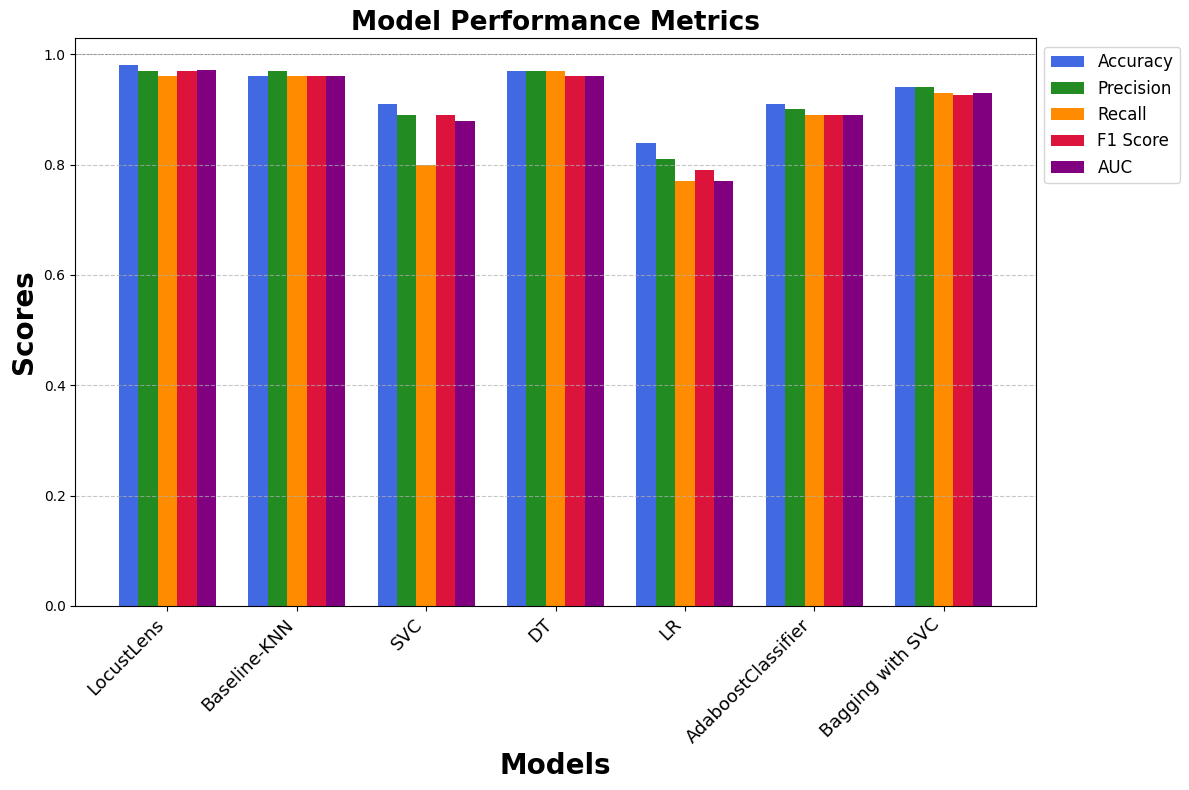

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Define the models and their corresponding scores
models = ['LocustLens', 'Baseline-KNN', 'SVC', 'DT', 'LR', 'AdaboostClassifier', 'Bagging with SVC']
accuracy = [0.98, 0.96, 0.91, 0.97, 0.84, 0.91, 0.94]
f1_score = [0.97, 0.96, 0.89, 0.96, 0.79, 0.89, 0.927]
auc = [0.971, 0.96, 0.88, 0.96, 0.77, 0.89, 0.93]
precision = [0.97, 0.97, 0.89, 0.97, 0.81, 0.9, 0.94]
recall = [0.96, 0.96, 0.80, 0.97, 0.77, 0.89, 0.93]

x = np.arange(len(models))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))  # Set the figure size

# Plot the bars for each score
rects1 = ax.bar(x - 2*width, accuracy, width, label='Accuracy', color='royalblue')
rects2 = ax.bar(x - width, precision, width, label='Precision', color='forestgreen')
rects3 = ax.bar(x, recall, width, label='Recall', color='darkorange')
rects4 = ax.bar(x + width, f1_score, width, label='F1 Score', color='crimson')
rects5 = ax.bar(x + 2*width, auc, width, label='AUC', color='Purple')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Models', fontsize=20, fontweight='bold')
ax.set_ylabel('Scores', fontsize=20, fontweight='bold')
ax.set_title('Model Performance Metrics', fontsize=19, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right', fontsize=13)

# Add horizontal lines representing the range of score values (0 to 1)
ax.axhline(y=1, color='gray', linestyle='--', linewidth=0.5)
ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.5)

# Add gridlines for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Move the legend to the top right corner
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1), fontsize='large')

fig.tight_layout()

plt.show()
